# Machine Learning and Data Mining: Lab 03
---------------

### Exercise 1: Missing Values

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('soldicecream.csv')
df

,temperature,soldicecream
0,8,15.0
1,9,19.0
2,10,20.0
3,11,23.0
4,12,29.0
5,13,41.0
6,14,45.0
7,15,NaN
8,16,53.0
9,17,58.0


##### __(a) Fill in the missing values using the attribute mean. Plot the result using the ``seaborn.scatterplot``method.__ 

In [3]:
dfWithMean = df.fillna(df.mean())
dfWithMean

,temperature,soldicecream
0,8,15.000000
1,9,19.000000
2,10,20.000000
3,11,23.000000
4,12,29.000000
5,13,41.000000
6,14,45.000000
7,15,77.684211
8,16,53.000000
9,17,58.000000


<AxesSubplot:xlabel='temperature', ylabel='soldicecream'>

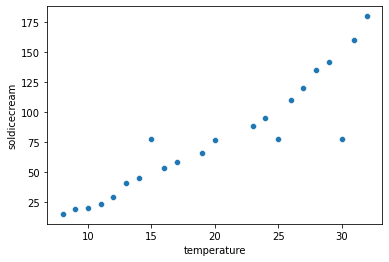

In [4]:
sns.scatterplot(data=dfWithMean, x="temperature", y="soldicecream")

##### __(b) Instead of filling the missing values with the mean, we will now try to fill them using linear regression like shown in the lecture. Plot the result using the ``seaborn.scatterplot`` method.__

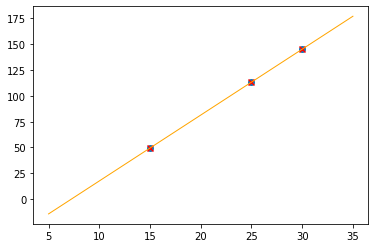

In [30]:
import matplotlib.pyplot as plt
#Version von Lehrer:
idx = ~np.isnan(df['soldicecream'])
y = df['soldicecream'][idx]
x = df['temperature'][idx]
xMean = x.mean()
yMean = y.mean()

b = np.sum((x-xMean) * (y-yMean)) / np.sum((x - xMean)**2)
a = yMean - b * xMean

value = df['temperature'][~idx]
yy = (b * value) + a

x_lf = np.linspace(5,35,300)
y_lf = a + (b * x_lf)
plt.plot(x_lf, y_lf, color='orange', linewidth=1)

plt.scatter(value,yy)
plt.scatter(value, yy, color='red', marker='x')

<AxesSubplot:xlabel='temperature', ylabel='soldicecream'>

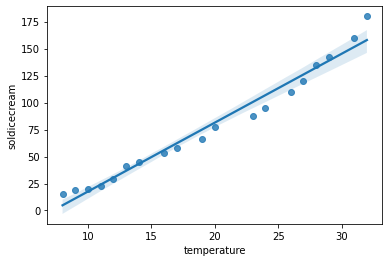

In [27]:
sns.regplot(x="temperature", y="soldicecream", data=df)

---

### Exercise 2: Sampling

In [33]:
import pandas as pd

df = pd.read_csv('data.csv')
df.head()

,id,Gender,Size (cm),Weight (kg),Hair Color,Blood Type,Glasses
0,22,Female,175,65,red,A,yes
1,23,Female,176,71,red,AB,yes
2,24,Female,176,71,red,O,yes
3,25,Female,179,69,black,B,yes
4,26,Female,195,62,black,B,no


##### __(a) Implement a python function, which uses simple random sampling for choosing 13 data points.__

In [35]:
randomSamplingDF = df.sample(n=13)
randomSamplingDF

,id,Gender,Size (cm),Weight (kg),Hair Color,Blood Type,Glasses
15,37,Male,172,67,brown,A,yes
1,23,Female,176,71,red,AB,yes
17,39,Male,185,62,brown,A,no
8,30,Female,166,52,brown,AB,no
5,27,Female,203,64,black,O,yes
16,38,Male,172,58,brown,A,no
11,33,Female,168,59,blond,B,no
10,32,Female,168,70,brown,O,yes
7,29,Female,172,62,brown,AB,no
12,34,Male,168,62,black,B,no


##### __(b) Implement a python function, which uses systematic random sampling for choosing 7 data points. Sort the data by the attribute “Weight” first.__

In [41]:
sortedColumnWeight = df.sort_values(by=['Weight (kg)'])
k = round(len(sortedColumnWeight.index)/7.0)
sortedColumnWeight.iloc[::k, :]

,id,Gender,Size (cm),Weight (kg),Hair Color,Blood Type,Glasses
8,30,Female,166,52,brown,AB,no
11,33,Female,168,59,blond,B,no
7,29,Female,172,62,brown,AB,no
5,27,Female,203,64,black,O,yes
9,31,Female,182,67,brown,AB,no
10,32,Female,168,70,brown,O,yes
1,23,Female,176,71,red,AB,yes


In [42]:
import numpy as np
def systematic_sampling(df, step):
    indexes = np.arange(0, len(df), step=step)
    systematic_sample = df.iloc[indexes]
    return systematic_sample

systematic_sample = systematic_sampling(sortedColumnWeight, 3)
systematic_sample

,id,Gender,Size (cm),Weight (kg),Hair Color,Blood Type,Glasses
8,30,Female,166,52,brown,AB,no
11,33,Female,168,59,blond,B,no
7,29,Female,172,62,brown,AB,no
5,27,Female,203,64,black,O,yes
9,31,Female,182,67,brown,AB,no
10,32,Female,168,70,brown,O,yes
1,23,Female,176,71,red,AB,yes


##### __(c) Implement a python function, which uses stratified random sampling for choosing 9 data points. Use the attribute “Hair Color” as strata definition.__

In [10]:
stratifiedSampling = df.groupby('Hair Color', group_keys=False).apply(lambda x: x.sample())
stratifiedSampling

,id,Gender,Size (cm),Weight (kg),Hair Color,Blood Type,Glasses
3,25,Female,179,69,black,B,yes
11,33,Female,168,59,blond,B,no
16,38,Male,172,58,brown,A,no
1,23,Female,176,71,red,AB,yes


---

### Exercise 3: Pearson Correlation Coeficient

In [11]:
import pandas as pd

df = pd.read_csv('data3.csv')
df

,id,Gender,Size (cm),Weight (kg),Hair Color,Blood Type,Glasses
0,22,Female,175,65,red,A,yes
1,23,Female,176,71,red,AB,yes
2,24,Female,176,71,red,O,yes
3,25,Female,179,69,black,B,yes
4,26,Female,195,62,black,B,no
5,27,Female,203,64,black,O,yes
6,28,Female,160,70,brown,AB,no
7,29,Female,172,62,brown,AB,no
8,30,Female,166,52,brown,AB,no
9,31,Female,182,67,brown,AB,no


##### __(a) Drop the columns `id`, `Hair Color` and `Blood Type`__

In [12]:
dfDropMatrix = df.drop(columns=['id', 'Hair Color', 'Blood Type'])
dfDropMatrix

,Gender,Size (cm),Weight (kg),Glasses
0,Female,175,65,yes
1,Female,176,71,yes
2,Female,176,71,yes
3,Female,179,69,yes
4,Female,195,62,no
5,Female,203,64,yes
6,Female,160,70,no
7,Female,172,62,no
8,Female,166,52,no
9,Female,182,67,no


##### __(b) Replace `Female` with `1` and `Male` with `0` in the column `Gender`. Replace `yes` with `1` and `no` with `0` in the column `Glasses`.__

In [13]:
dfReplaceMatrix = dfDropMatrix.replace({'Female': 1, 'Male':0, 'yes': 1, 'no': 0})
dfReplaceMatrix

,Gender,Size (cm),Weight (kg),Glasses
0,1,175,65,1
1,1,176,71,1
2,1,176,71,1
3,1,179,69,1
4,1,195,62,0
5,1,203,64,1
6,1,160,70,0
7,1,172,62,0
8,1,166,52,0
9,1,182,67,0


##### __(c) Write down by hand: Between which attributes do you expect a high/low correlation? Is the correlation positive or negative?__

##### __(d) Calculate the correlation between all attributes using your own function (do not use `df.corr()`)__

In [16]:
import numpy as np

df = pd.read_csv('data.csv')

df['Gender'] = df['Gender'].map({'Female': 1, 'Male': 0})
df['Glasses'] = df['Glasses'].map({'yes': 1, 'no': 0})

meanId = df['id'].mean()
meanSize = df['Size (cm)'].mean()
meanGender = df['Gender'].mean()
meanWeight = df['Weight (kg)'].mean()
meanGlasses = df['Glasses'].mean()

means = np.array([meanId, meanSize, meanGender, meanWeight, meanGlasses])
meansStrVal = np.array(['id', 'Size (cm)', 'Gender', 'Weight (kg)', 'Glasses'])

corrValues = np.zeros((5,5)) 
for i in range(len(means)):
    for j in range(len(means)):
        corrValues[i][j] = sum((df[meansStrVal[i]]-means[i])*(df[meansStrVal[j]]-means[j]))/np.sqrt(sum((df[meansStrVal[i]]-means[i])**2)*sum((df[meansStrVal[j]]-means[j])**2))

print(corrValues)

[[ 1.          0.0313028  -0.84959079 -0.10274873 -0.21786958]
 [ 0.0313028   1.         -0.08277408  0.17462429  0.26689647]
 [-0.84959079 -0.08277408  1.          0.05953924  0.12309149]
 [-0.10274873  0.17462429  0.05953924  1.          0.69440129]
 [-0.21786958  0.26689647  0.12309149  0.69440129  1.        ]]


In [16]:
# For comparison
dfReplaceMatrix.corr()

,Gender,Size (cm),Weight (kg),Glasses
Gender,1.000000,-0.082774,0.059539,0.123091
Size (cm),-0.082774,1.000000,0.174624,0.266896
Weight (kg),0.059539,0.174624,1.000000,0.694401
Glasses,0.123091,0.266896,0.694401,1.000000


##### __(d) Calculate the correlation between all attributes for men__

##### __(e) Answer the following questions__

1. Do the correlations match your assumptions from task c? What is different?
2. Why is the correlation between size and weight much higher for men than for men/women combined?
3. What are typical characteristics of men wearing glasses according to this dataset? Is this also true in the real world?

In [17]:

df = pd.read_csv('data.csv')
df['Gender'] = df['Gender'].map({'Female': 1, 'Male': 0})
df['Glasses'] = df['Glasses'].map({'yes': 1, 'no': 0})

df = df.loc[df['Gender'] == 0] # Filterung Mann

meanId = df['id'].mean()
meanSize = df['Size (cm)'].mean()
meanGender = df['Gender'].mean()
meanWeight = df['Weight (kg)'].mean()
meanGlasses = df['Glasses'].mean()

means = np.array([meanId, meanSize, meanGender, meanWeight, meanGlasses])

meansStrVal = np.array(['id', 'Size (cm)', 'Gender', 'Weight (kg)', 'Glasses'])

corrValues = np.zeros((5,5)) 
for i in range(len(means)):
    for j in range(len(means)):
        corrValues[i][j] = sum((df[meansStrVal[i]]-means[i])*(df[meansStrVal[j]]-means[j]))/np.sqrt(sum((df[meansStrVal[i]]-means[i])**2)*sum((df[meansStrVal[j]]-means[j])**2))

print(corrValues)

[[1.         0.74463002        nan 0.58505328 0.61977979]
 [0.74463002 1.                nan 0.62276604 0.39716092]
 [       nan        nan        nan        nan        nan]
 [0.58505328 0.62276604        nan 1.         0.88320834]
 [0.61977979 0.39716092        nan 0.88320834 1.        ]]


C:\Users\SELIMA~1\AppData\Local\Temp/ipykernel_2584/4130314261.py:20: RuntimeWarning: invalid value encountered in double_scalars
  corrValues[i][j] = sum((df[meansStrVal[i]]-means[i])*(df[meansStrVal[j]]-means[j]))/np.sqrt(sum((df[meansStrVal[i]]-means[i])**2)*sum((df[meansStrVal[j]]-means[j])**2))


---

### Exercise 4: Visualization

In [19]:
import seaborn as sns
df = sns.load_dataset("iris")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


##### __(a) Plot the histogram of the `sepal_length`__

<AxesSubplot:xlabel='sepal_length', ylabel='Count'>

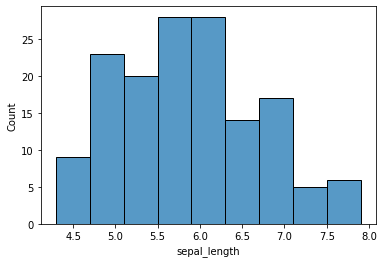

In [20]:
sns.histplot(data=df, x="sepal_length")

##### __(b) What kind of distribution is this?__

In [21]:
#Multimodal

##### __(c) Make a scatter plot between the variables `x=sepal_length` and `y=sepal_width`. Make another scatter plot between `x=petal_length` and `y=petal_width`. For both plots, color the points according to the species.__

<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>

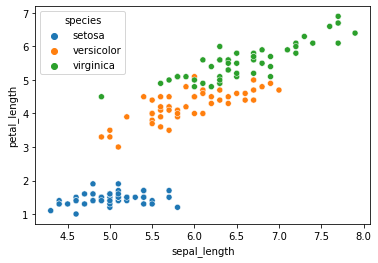

In [22]:
sns.scatterplot(data=df, x="sepal_length", y="petal_length", hue="species")

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

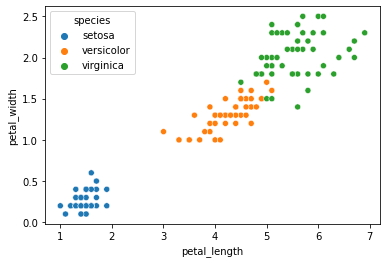

In [23]:
sns.scatterplot(data=df, x="petal_length", y="petal_width", hue="species")

##### __(d) Answer the following questions__
1. What are typical characteristics of "setosa"?
2. Can we seperate the species "versicolor" and "virginica" using only the "sepal width"? Which attribute(s) are more helpful to distinguish these categories?

In [24]:
#

##### __(e) Approximate the petal area by multiplying the petal length by the petal width. Show that this new attribute can be useful for a classifier by creating a boxplot of it.__

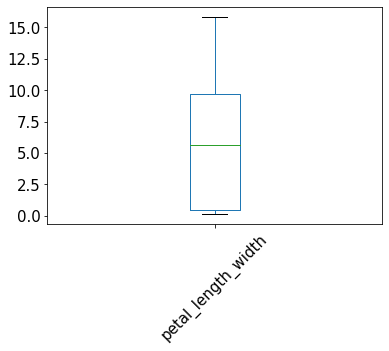

In [25]:
df = sns.load_dataset("iris")
df["petal_length_width"] = df["petal_length"] * df["petal_width"]
df = df.drop(['sepal_length', 'sepal_width', 'petal_length', 'species', 'petal_width'], axis=1)
boxplot = df.boxplot(grid=False, rot=45, fontsize=15)